<a href="https://colab.research.google.com/github/gc2321/3235-Machine-Learning/blob/main/XTRA_NEURO_NET_EXERCISES/2_cnn_classification_Fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed(42)

In [1]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]], dtype=uint8)
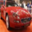

In [6]:
x_train[5]

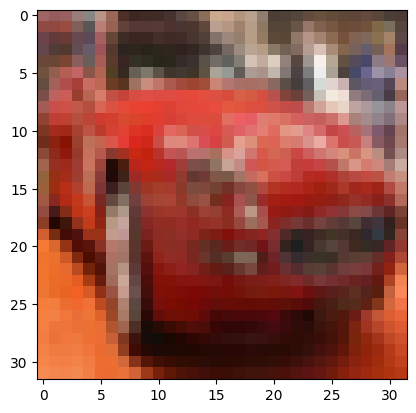

In [8]:
plt.imshow(x_train[5])

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

## Process Data

In [11]:
# min = 0, max = 255, scale to values between 0, 1;
x_train = x_train/255
x_test = x_test/255

In [12]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

## Labels

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_cat_train = to_categorical(y_train,10)

In [15]:
y_cat_test = to_categorical(y_test,10)

## Training the Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 256)               2

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [21]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.5028 - accuracy: 0.4627 - val_loss: 1.3678 - val_accuracy: 0.5247
Epoch 2/15
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1413 - accuracy: 0.5995 - val_loss: 1.1189 - val_accuracy: 0.6096
Epoch 3/15
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9941 - accuracy: 0.6562 - val_loss: 1.0619 - val_accuracy: 0.6266
Epoch 4/15
1563/1563 [==============================] - 54s 34ms/step - loss: 0.8911 - accuracy: 0.6921 - val_loss: 1.0596 - val_accuracy: 0.6429
Epoch 5/15
1563/1563 [==============================] - 54s 34ms/step - loss: 0.8129 - accuracy: 0.7205 - val_loss: 1.1185 - val_accuracy: 0.6536
Epoch 6/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7499 - accuracy: 0.7433 - val_loss: 1.0411 - val_accuracy: 0.6586
Epoch 7/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6970 - accuracy: 0.7636 - val_loss: 1.0793 -

## Evaluate the Model

In [22]:
model.metrics_names

['loss', 'accuracy']

In [23]:
losses = pd.DataFrame(model.history.history)

In [24]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.502780,0.46274,1.367833,0.5247
1,1.141344,0.59950,1.118907,0.6096
2,0.994105,0.65622,1.061899,0.6266
3,0.891118,0.69212,1.059585,0.6429
4,0.812866,0.72050,1.118517,0.6536


<Axes: >

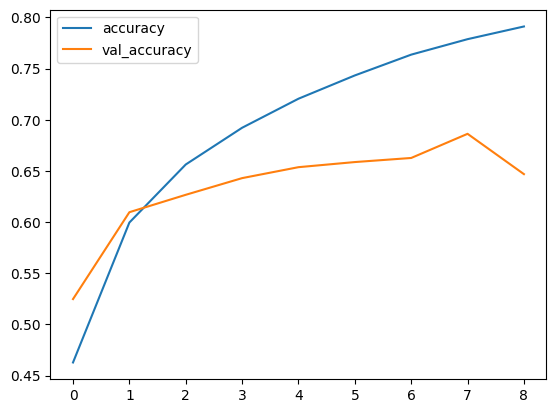

In [25]:
losses[['accuracy','val_accuracy']].plot()

<Axes: >

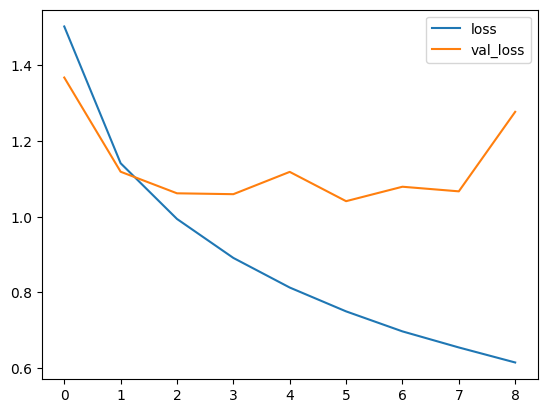

In [26]:
losses[['loss','val_loss']].plot()

In [27]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.2771884202957153, 0.6467999815940857]


In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
predictions = model.predict(x_test)

313/313 [==============================] - 3s 9ms/step


In [30]:
predicted_classes = np.argmax(predictions, axis=1)

In [31]:
predicted_classes

array([3, 1, 8, ..., 5, 1, 7])

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.81      0.61      0.70      1000
           1       0.75      0.82      0.78      1000
           2       0.58      0.53      0.55      1000
           3       0.53      0.38      0.45      1000
           4       0.69      0.48      0.57      1000
           5       0.48      0.67      0.56      1000
           6       0.51      0.90      0.65      1000
           7       0.85      0.60      0.71      1000
           8       0.84      0.69      0.75      1000
           9       0.69      0.79      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.67      0.65      0.64     10000
weighted avg       0.67      0.65      0.64     10000



In [33]:
confusion_matrix(y_test,predicted_classes)

array([[612,  53,  89,  11,  17,  17,  53,   8,  69,  71],
       [  5, 816,   3,   8,   2,   9,  36,   2,  11, 108],
       [ 38,   7, 529,  35,  52, 133, 170,  13,   7,  16],
       [ 11,  15,  58, 384,  38, 258, 169,  23,  14,  30],
       [ 10,   7,  81,  75, 482,  89, 206,  29,   8,  13],
       [  6,   7,  55,  99,  30, 672,  90,  24,   3,  14],
       [  1,   2,  22,  36,  10,  26, 895,   1,   0,   7],
       [ 12,   8,  47,  47,  55, 141,  53, 603,   4,  30],
       [ 54,  86,  24,  15,   8,  19,  31,   4, 685,  74],
       [ 10,  94,  11,  15,   2,  25,  35,   3,  15, 790]])

<Axes: >

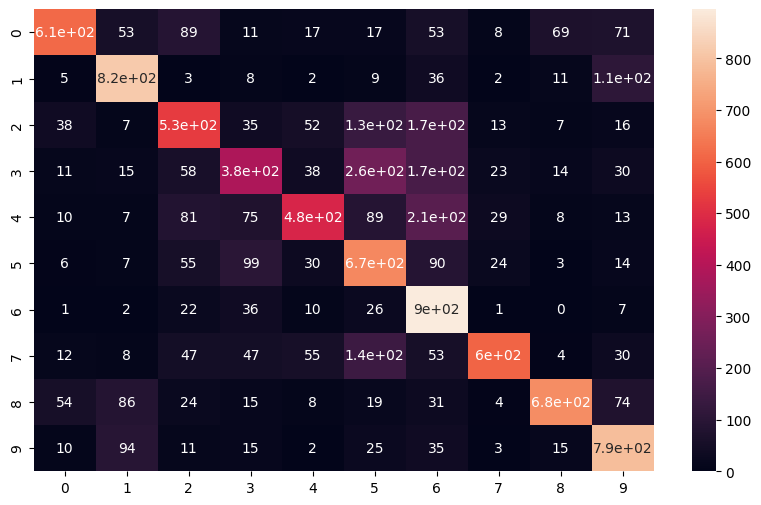

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predicted_classes),annot=True)

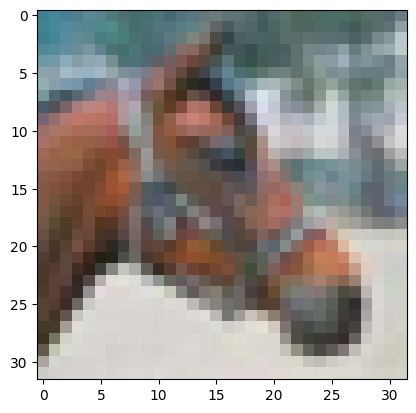

In [36]:
# prediction
my_image = x_test[17]
plt.imshow(my_image)

In [39]:
predict = model.predict(my_image.reshape(1,32,32,3))

1/1 [==============================] - 0s 34ms/step


In [40]:
np.argmax(predict, axis=1)

array([3])

In [41]:
y_test[17]

array([7], dtype=uint8)

In [40]:
    # 0.Airplane
    # 1.Automobile
    # 2.Bird
    # 3.Cat
    # 4.Deer
    # 5.Dog
    # 6.Frog
    # 7.Horse
    # 8.Ship
    # 9.Truck